# Text to Text Explanation: Machine Translation Multi-Sample Example

This notebook demonstrates multi-sample text inputs and global visualization across multiple inputs. It uses the same model as the first example from Machine Translation example from the Machine Translation Explanation Demo notebook. Tokens from 1) both input sequences 2) single input sequence are both called to demonstrate the global token visualization results. 

In [1]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import shap
import torch

### Load model and tokenizer

In [2]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-es")

### Define multi-data to translate

In [3]:
s1="In this picture, there are four persons: my father, my mother, my brother and my sister."
s2="In our team, we have a total of five members."
s = [s1,s2]

### Create an explainer object

In [4]:
explainer = shap.Explainer(model,tokenizer)

### Compute shap values

In [5]:
shap_values = explainer(s)

Partition explainer: 3it [00:13,  4.45s/it]               


Check that output names matches for different size text sequence

In [6]:
shap_values.output_names

array([array(['▁En', '▁este', '▁cuadro', ',', '▁hay', '▁cuatro', '▁personas',
       ':', '▁mi', '▁padre', ',', '▁mi', '▁madre', ',', '▁mi', '▁hermano',
       '▁y', '▁mi', '▁hermana', '.'], dtype='<U9'),
       array(['▁En', '▁nuestro', '▁equipo', ',', '▁tenemos', '▁un', '▁total',
       '▁de', '▁cinco', '▁miembros', '.'], dtype='<U9')], dtype=object)

Check feature names for a token that appears in both input sequences. It is expected to include inputs from both input sequence.

In [7]:
shap_values[...,'▁En'].feature_names

array([array(['▁In ', '▁this ', '▁picture ', ', ', '▁there ', '▁are ', '▁four ',
       '▁persons ', ': ', '▁my ', '▁father ', ', ', '▁my ', '▁mother ',
       ', ', '▁my ', '▁brother ', '▁and ', '▁my ', '▁sister ', '. ', ' '],
      dtype='<U9'),
       array(['▁In ', '▁our ', '▁team ', ', ', '▁we ', '▁have ', '▁a ',
       '▁total ', '▁of ', '▁five ', '▁members ', '. ', ' '], dtype='<U9')],
      dtype=object)

Check feature names for a token that appears in one of two input sequences. It is expected to include input from only the corresponding input sequence.

In [8]:
shap_values[...,'▁cuadro'].feature_names

array([['▁In ', '▁this ', '▁picture ', ', ', '▁there ', '▁are ',
        '▁four ', '▁persons ', ': ', '▁my ', '▁father ', ', ', '▁my ',
        '▁mother ', ', ', '▁my ', '▁brother ', '▁and ', '▁my ',
        '▁sister ', '. ', ' ']], dtype='<U9')

In [9]:
shap_values[...,'▁equipo'].feature_names

array([['▁In ', '▁our ', '▁team ', ', ', '▁we ', '▁have ', '▁a ',
        '▁total ', '▁of ', '▁five ', '▁members ', '. ', ' ']], dtype='<U9')

### Global Bar Visualization 

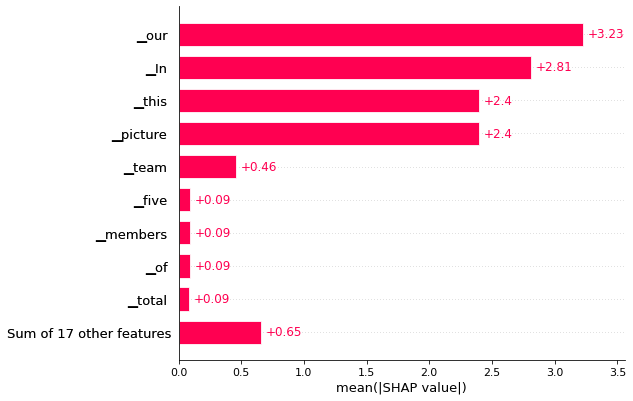

In [10]:
shap.plots.bar(shap_values[...,'▁En'])

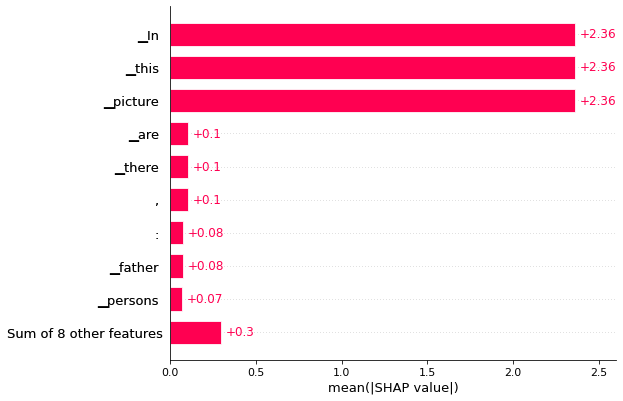

In [11]:
shap.plots.bar(shap_values[...,'▁cuadro'])

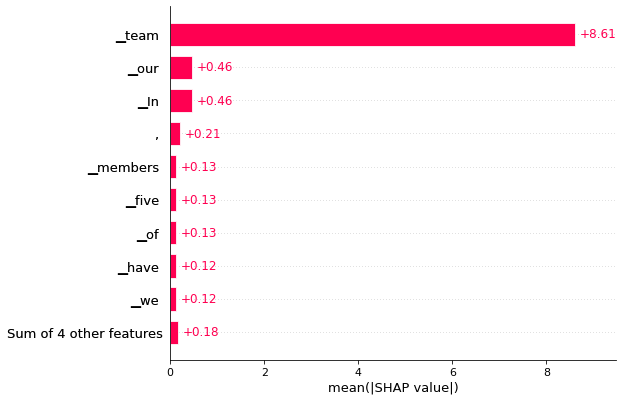

In [12]:
shap.plots.bar(shap_values[...,'▁equipo'])